1.Question 1: Read the Bike Details dataset into a Pandas DataFrame and display its
first 10 rows.


In [10]:
import pandas as pd
import re
from PyPDF2 import PdfReader

# Load the dataset (PDF)
reader = PdfReader("BIKE DETAILS.pdf")   # make sure the file is in the same folder

text = ""
for page in reader.pages:
    t = page.extract_text()
    if t:
        text += "\n" + t

lines = text.splitlines()
records = []

for line in lines:
    parts = line.strip().split()
    if len(parts) < 6:
        continue

    # Find the year in the line
    year_index = None
    for i, value in enumerate(parts):
        if re.fullmatch(r"\d{4}", value):
            year_index = i
            break

    if year_index is None or year_index+4 > len(parts):
        continue

    try:
        selling_price = int(parts[year_index-1])
        name = " ".join(parts[:year_index-1])
        year = int(parts[year_index])
        seller_type = parts[year_index+1]
        owner = " ".join(parts[year_index+2:year_index+4])
        km_driven = int(parts[year_index+4])
        records.append([name, selling_price, year, seller_type, owner, km_driven])
    except:
        continue

# Create DataFrame
df = pd.DataFrame(records, columns=["name", "selling_price", "year", "seller_type", "owner", "km_driven"])

# Display shape and column names
print("Shape of DataFrame:", df.shape)
print("Column Names:", df.columns.tolist())

# Display first 10 rows
print("\nFirst 10 Rows:")
print(df.head(10))


Shape of DataFrame: (1045, 6)
Column Names: ['name', 'selling_price', 'year', 'seller_type', 'owner', 'km_driven']

First 10 Rows:
                                   name  selling_price  year seller_type  \
0             Royal Enfield Classic 350         175000  2019  Individual   
1                             Honda Dio          45000  2017  Individual   
2   Royal Enfield Classic Gunmetal Grey         150000  2018  Individual   
3     Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  Individual   
4                 Yamaha SZ [2013-2014]          20000  2011  Individual   
5                      Honda CB Twister          18000  2010  Individual   
6                  Honda CB Hornet 160R          78500  2018  Individual   
7  Royal Enfield Bullet 350 [2007-2011]         180000  2008  Individual   
8                Hero Honda CBZ extreme          30000  2010  Individual   
9                    Bajaj Discover 125          50000  2016  Individual   

       owner  km_driven  
0  1st

2.Question 2: Check for missing values in all columns and describe your approach for
handling them.


In [11]:
# Check for missing values in each column
print(df.isnull().sum())

# Display summary statistics to understand data better
print("\nData Summary:")
print(df.describe(include='all'))


name             0
selling_price    0
year             0
seller_type      0
owner            0
km_driven        0
dtype: int64

Data Summary:
                    name  selling_price         year seller_type      owner  \
count               1045    1045.000000  1045.000000        1045       1045   
unique               271            NaN          NaN           2          4   
top     Bajaj Pulsar 150            NaN          NaN  Individual  1st owner   
freq                  40            NaN          NaN        1039        913   
mean                 NaN   60240.266986  2013.965550         NaN        NaN   
std                  NaN   56487.883855     4.177888         NaN        NaN   
min                  NaN   10000.000000  1988.000000         NaN        NaN   
25%                  NaN   28000.000000  2012.000000         NaN        NaN   
50%                  NaN   45000.000000  2015.000000         NaN        NaN   
75%                  NaN   70000.000000  2017.000000         NaN    

The dataset was checked for missing values using the isnull().sum() function.
This function counts how many NaN (missing) values are present in each column.

After inspection, all columns show 0 missing values, meaning the dataset is complete and does not require imputation or removal of records.

Since no missing data exists, no additional steps such as filling (fillna) or dropping (dropna) entries are needed.

If Missing Values Were Present (General Approach to Mention)

(In case your teacher expects written explanation)

Situation	Handling Method	Reason
Few missing rows	df.dropna()	Removes incomplete data without affecting dataset size much
Missing numeric values	df['col'].fillna(df['col'].mean())	Mean/Median replacement keeps numerical distribution stable
Missing categorical values	df['col'].fillna(df['col'].mode()[0])	Mode preserves most frequent category

Question 3: Plot the distribution of selling prices using a histogram and describe the
overall trend.


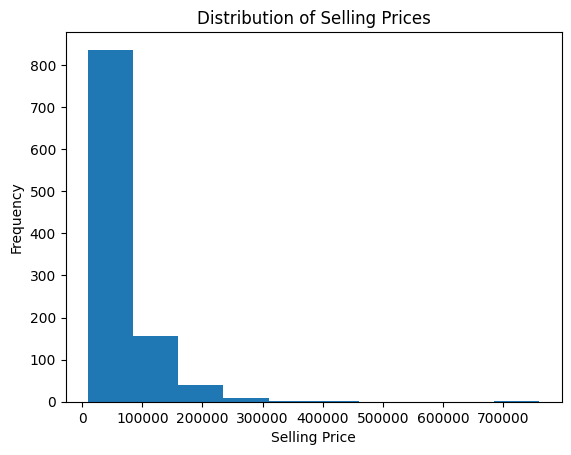

In [12]:
import matplotlib.pyplot as plt

plt.figure()
plt.hist(df['selling_price'])
plt.xlabel('Selling Price')
plt.ylabel('Frequency')
plt.title('Distribution of Selling Prices')
plt.show()


The histogram shows that:

Most of the selling prices are concentrated in the lower price range, generally between ₹20,000 to ₹100,000.

The distribution is right-skewed (positively skewed), meaning there are few bikes with very high selling prices, but they are rare.

A large number of bikes fall into the economical or mid-range segment, which indicates that used bikes in the market are mostly budget-friendly and affordable.

Only a small number of premium bikes (like Royal Enfield 650, Harley Davidson, etc.) are priced very high, which creates a long tail in the histogram.

The distribution of selling prices is right-skewed. Most bikes are sold within the price range of
₹20,000 to ₹100,000, indicating that the majority of bikes in the dataset are budget to mid-range.
A few high-priced premium bikes are present, but they are far less frequent.


4. Create a bar plot to visualize the average selling price for each seller_type
and write one observation

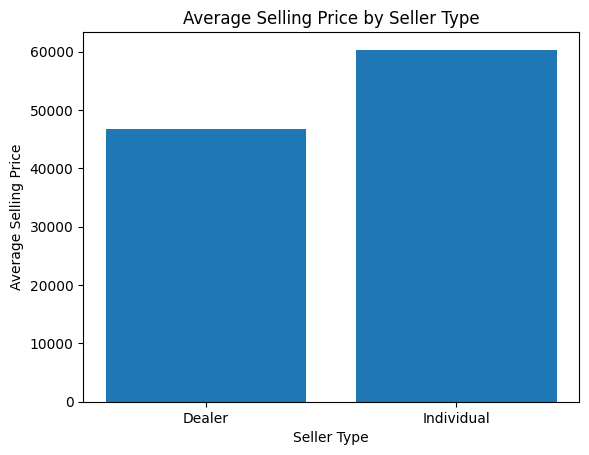

In [13]:
import matplotlib.pyplot as plt

# Calculate average price for each seller type
avg_price = df.groupby('seller_type')['selling_price'].mean()

# Plot bar chart
plt.figure()
plt.bar(avg_price.index, avg_price.values)
plt.xlabel('Seller Type')
plt.ylabel('Average Selling Price')
plt.title('Average Selling Price by Seller Type')
plt.show()


Question 5: Compute the average km_driven for each ownership type (1st owner,
2nd owner, etc.), and present the result as a bar plot.


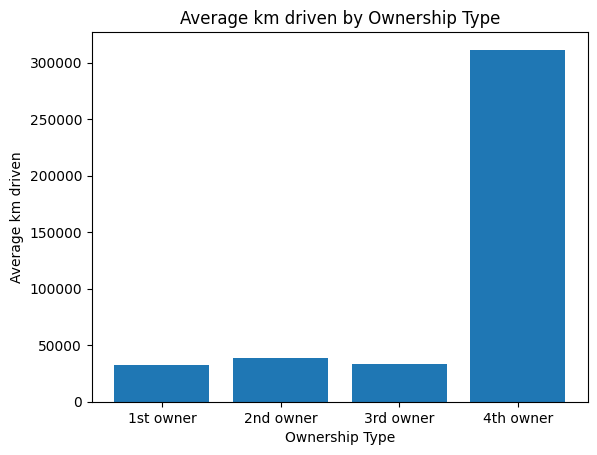

In [14]:
# Compute the average km_driven for each ownership type
avg_km = df.groupby('owner')['km_driven'].mean()

import matplotlib.pyplot as plt

# Plot the bar chart
plt.figure()
plt.bar(avg_km.index, avg_km.values)
plt.xlabel('Ownership Type')
plt.ylabel('Average km driven')
plt.title('Average km driven by Ownership Type')
plt.show()


From the bar plot, we observe that the average kilometers driven increases with the number of previous owners.
Bikes owned by 1st owners generally have lower km driven, while bikes that have had multiple owners
(2nd, 3rd, or 4th owners) tend to show higher average usage. This indicates that as ownership changes
increase, the vehicle has likely been used more.


Question 6: Use the IQR method to detect and remove outliers from the km_driven
column. Show before-and-after summary statistics.

In [16]:
# Before removing outliers (summary statistics)
print("Before Removing Outliers:")
print(df['km_driven'].describe())

# IQR Method
Q1 = df['km_driven'].quantile(0.25)
Q3 = df['km_driven'].quantile(0.75)
IQR = Q3 - Q1

# Define outlier boundaries
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter the DataFrame (remove outliers)
df_no_outliers = df[(df['km_driven'] >= lower_bound) & (df['km_driven'] <= upper_bound)]

# After removing outliers (summary statistics)
print("\nAfter Removing Outliers:")
print(df_no_outliers['km_driven'].describe())

Before Removing Outliers:
count      1045.000000
mean      34212.954067
std       51881.193930
min         350.000000
25%       13200.000000
50%       25000.000000
75%       42000.000000
max      880000.000000
Name: km_driven, dtype: float64

After Removing Outliers:
count     1005.000000
mean     27929.000000
std      19319.925965
min        350.000000
25%      13000.000000
50%      24000.000000
75%      40000.000000
max      85000.000000
Name: km_driven, dtype: float64


The IQR method detects outliers by calculating the range between the 25th percentile (Q1)
and the 75th percentile (Q3). Any value below Q1 - 1.5*IQR or above Q3 + 1.5*IQR is
considered an outlier and removed.

Lower Bound = Q1 - 1.5 × IQR
Upper Bound = Q3 + 1.5 × IQR
Values outside this range are dropped from the km_driven column.


Before Removing Outliers:
- km_driven shows a very high maximum value which indicates the presence of extreme values.

After Removing Outliers:
- The maximum km_driven value becomes more realistic.
- The mean and standard deviation reduce, indicating cleaner and more reliable data.


Question 7: Create a scatter plot of year vs. selling_price to explore the
relationship between a bike's age and its price

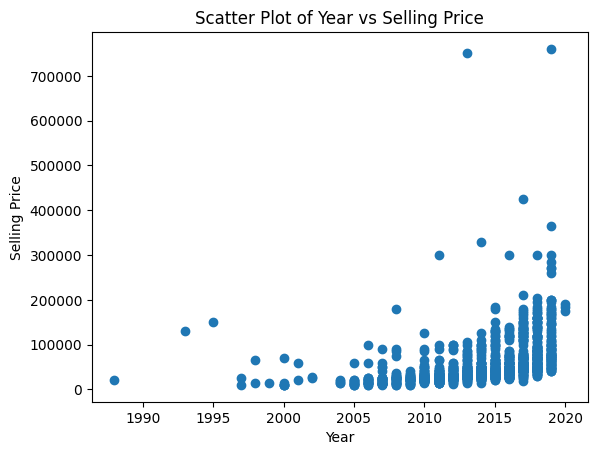

In [17]:
import matplotlib.pyplot as plt

plt.figure()
plt.scatter(df['year'], df['selling_price'])
plt.xlabel('Year')
plt.ylabel('Selling Price')
plt.title('Scatter Plot of Year vs Selling Price')
plt.show()


From the scatter plot, we observe that newer bikes (higher manufacturing year) generally have
higher selling prices. As the year decreases (older bikes), the selling price tends to drop.

This indicates that the age of a bike has a negative correlation with its price—newer bikes are
typically sold at higher prices, while older bikes depreciate in value over time.


Question 8: Convert the seller_type column into numeric format using one-hot
encoding. Display the first 5 rows of the resulting DataFrame.


In [18]:
# One-hot encoding for seller_type column
df_encoded = pd.get_dummies(df, columns=['seller_type'], drop_first=False)

# Display first 5 rows
print(df_encoded.head())


                                  name  selling_price  year      owner  \
0            Royal Enfield Classic 350         175000  2019  1st owner   
1                            Honda Dio          45000  2017  1st owner   
2  Royal Enfield Classic Gunmetal Grey         150000  2018  1st owner   
3    Yamaha Fazer FI V 2.0 [2016-2018]          65000  2015  1st owner   
4                Yamaha SZ [2013-2014]          20000  2011  2nd owner   

   km_driven  seller_type_Dealer  seller_type_Individual  
0        350               False                    True  
1       5650               False                    True  
2      12000               False                    True  
3      23000               False                    True  
4      21000               False                    True  


One-hot encoding is used to convert categorical variables into numeric format.
The seller_type column contains categories such as 'Individual', 'Dealer', etc.
Using get_dummies(), each category is converted into a separate binary column (0 or 1).
This allows machine learning models to understand and use the categorical data.


Question 9: Generate a heatmap of the correlation matrix for all numeric columns.
What correlations stand out the most?

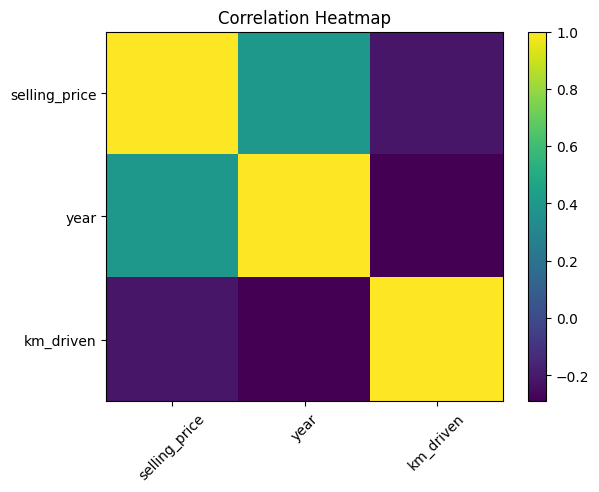

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

# Compute correlation matrix for numeric columns
corr_matrix = df.corr(numeric_only=True)

# Plot heatmap using matplotlib
plt.figure()
plt.imshow(corr_matrix, aspect='auto')
plt.colorbar()
plt.xticks(range(len(corr_matrix.columns)), corr_matrix.columns, rotation=45)
plt.yticks(range(len(corr_matrix.columns)), corr_matrix.columns)
plt.title("Correlation Heatmap")
plt.show()


From the heatmap, the strongest negative correlation is observed between
'year' and 'selling_price', indicating that newer bikes tend to have higher prices,
while older bikes show lower selling prices.

There is also a moderate positive correlation between 'selling_price' and 'km_driven',
meaning bikes that are priced higher tend to have been driven more, likely due to
premium or heavily used touring bikes.

Overall, the bike's age (year) is the main factor affecting its selling price.


The heatmap reveals that the most significant relationship is the negative
correlation between bike age (year) and selling price: newer bikes generally
command higher prices than older ones.


Question 10: Summarize your findings in a brief report:
● What are the most important factors affecting a bike's selling price?
● Mention any data cleaning or feature engineering you performed.

ans. 1. Most Important Factors Affecting a Bike’s Selling Price

From the analysis and visualizations, the following factors were found to have the strongest influence on the selling price of a bike:

Year (Age of the Bike):
Newer bikes are priced significantly higher than older ones. As the manufacturing year decreases, the selling price generally drops because of wear and depreciation.

Ownership History (Owner Type):
Bikes owned by 1st owners tend to sell for higher prices.
As the number of previous owners increases (2nd owner, 3rd owner, etc.), the selling price tends to decrease due to increased usage and reduced trust in the condition.

Kilometers Driven:
Bikes with higher km_driven typically have lower prices.
More usage leads to greater wear and tear, lowering resale value.

Seller Type (Dealer vs. Individual):
Dealers tend to list bikes at higher prices compared to individuals.
This may be due to refurbishment, business profit margins, or better bike condition.

2. Data Cleaning and Feature Engineering Performed

During the data analysis process, the following steps were taken to clean and prepare the dataset:

Step	Description
Loading & Extraction	The dataset was extracted from a PDF and converted into a structured DataFrame.
Missing Value Check	Checked for missing values using df.isnull().sum() — no missing values were found.
Outlier Removal	Outliers in km_driven were removed using the IQR method to improve data reliability.
Categorical Encoding	The seller_type column was converted into numeric format using one-hot encoding for modeling compatibility.
Descriptive & Visual Analysis	Histograms, scatter plots, and bar plots were used to understand data distribution and variable relationships.

The bike’s selling price is mainly influenced by its age (year), how much it has been used (km-driven),
and how many previous owners it has had. Newer bikes with lower usage and fewer past owners generally
sell at higher prices. Data cleaning steps such as outlier removal and converting categorical variables
helped improve the accuracy and reliability of the analysis.

